In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [90]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')
from pandas import set_option
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import copy as cp

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# **Airbnb New User Bookings**

In [5]:
#Importing the Datasets
df = pd.read_csv("train_users_2.csv")

## **1. Data Exploration/Analysis**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


#### **The data Set has 213451 examples and 15 features + the target variable (country_destination). 2 of the features are ints, 1 is float and 13 are objects.** 
#### Below, I have listed the features with a short description:
##### *id: User id*
##### *date_account_created: The date of account creation*
##### *timestamp_first_active: The timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up*
##### *date_first_booking: The date of first booking*
##### *gender: The gender of customer*
##### *age: The age of customer*
##### *signup_method: The signup process used by the customr. viz Website login, Google login, Facebook login*
##### *signup_flow: The page a user came to signup up from*
##### *language: The international language preference*
##### *affiliate_channel: What kind of paid marketing*
##### *affiliate_provider: Where the marketing is e.g. google, craigslist, other*
##### *first_affiliate_tracked: Whats the first marketing the user interacted with before the signing up*
##### *signup_app: The app for signup viz iOs, Android etc.*
##### *first_device_type: The type of device used by customer viz.Windows/Mac Desktop, Iphone, Ipad, Android Phone/Tablet*
##### *first_browser: The browser used by customer*
##### *country_destination: This is the target variable to be predicted* 

In [7]:
df.shape

(213451, 16)

In [8]:
df.describe(include='all')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,88908,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,1976,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,2tmdn2oi6u,2014-05-13,NaN,2014-05-22,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,248,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('Calculation for deriving percentages for description in following cell :',((124543/213451)*100), ((95688/213451)*100), ((206314/213451)*100))

Calculation for deriving percentages for description in following cell : 58.34734904029496 44.82902399145471 96.65637546790599


##### From Above, we can notice that,
##### *1. 58.35% of customers did not perform booking*
##### *2. Gender attribute is unknown for 44.83% of Customers* 
##### *3. Age has missing values; It starts from 1 year to a noisy data/incorrect entered data i.e 2014 (May be the customer entered year of birth instead of age (in years) for the age column)*
##### *4. 96.66% of customers speak english/ prefer english as a language*

In [10]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US



##### *From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so* 
##### *that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges,that we*
##### *will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a* 
##### *number), that wee need to deal with.*

##### *Let's take a more detailed look at what data is actually missing:*

In [11]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (np.around((df.isnull().sum()/df.isnull().count())*100,2)).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
date_first_booking,124543,58.35
age,87990,41.22
first_affiliate_tracked,6065,2.84
country_destination,0,0.00
first_browser,0,0.00
first_device_type,0,0.00
signup_app,0,0.00
affiliate_provider,0,0.00
affiliate_channel,0,0.00
language,0,0.00


##### *The date_first_booking feature has many missing values, but we do not need to impute it, since it will be null for all travellers, who*
##### *did not book and thier corresponding country destination is "NDF". It will be much more tricky, to deal with the 'Age' feature, which*
##### *has 87990 missing values and 'first_affiliate_tracked' feature, which has 6065 missing values.*

In [12]:
#records that have country destination as NDF
NDF_data=df.loc[(df['country_destination']=='NDF')]

In [13]:
NDF_data.shape

(124543, 16)

In [14]:
#records that have country destination and datae_first_bokking as null
NDF_date_data=df.loc[(df['country_destination']=='NDF')&(df['date_first_booking'].isnull())]

In [15]:
NDF_date_data.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
13,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF


In [16]:
NDF_date_data.shape

(124543, 16)

It is clear that the date first booking column is null only when country destination is NDF. 

Since we cannot impute any time values in date_first_booking and it is dependent on the country destination field. And this feild is null only for NDF country destination.
We will delete it from our data set

In [17]:
df_1=df.drop(columns=['date_first_booking'])

In [18]:
df_1.describe(include='all')

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
count,213451,213451,2.134510e+05,213451,125461.000000,213451,213451.000000,213451,213451,213451,207386,213451,213451,213451,213451
unique,213451,1634,NaN,4,NaN,3,NaN,25,8,18,7,4,9,52,12
top,2tmdn2oi6u,2014-05-13,NaN,-unknown-,NaN,basic,NaN,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
freq,1,674,NaN,95688,NaN,152897,NaN,206314,137727,137426,109232,182717,89600,63845,124543
mean,NaN,NaN,2.013085e+13,NaN,49.668335,NaN,3.267387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,9.253717e+09,NaN,155.666612,NaN,7.637707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2.009032e+13,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.012123e+13,NaN,28.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.013091e+13,NaN,34.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.014031e+13,NaN,43.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


there are few junk values like -unknown- in this dataset, for e.g column gender has such data in it , we can see if what all values are are there in categorical columns


In [19]:
print(" unique value for gender column : ",df_1['gender'].unique())

print("-----------------------------------------------------------------------\n")
print("Unique values for signup method :",df_1['signup_method'].unique())

print("-----------------------------------------------------------------------\n")
print ("Unique values for language : ", df_1['language'].unique())

print("-----------------------------------------------------------------------\n")
print("Unique values for affiliate channel : ",df_1['affiliate_channel'].unique())

print("-----------------------------------------------------------------------\n")
print("Unique values for affiliate provider : ",df_1.affiliate_provider.unique())

print("-----------------------------------------------------------------------\n")
print("Unque values for affilcate tracked : ", df_1.first_affiliate_tracked.unique())

print("-----------------------------------------------------------------------\n")
print("Unique values for signup_up : ",df_1.signup_app.unique())

print("-----------------------------------------------------------------------\n")
print("Unique values for first device type : ", df_1.first_device_type.unique())

print("-----------------------------------------------------------------------\n")
print("Unqiue values for first_browser : ",df_1.first_browser.unique())

print("-----------------------------------------------------------------------\n")
print("Unique Values for Country destination : ",df_1.country_destination.unique())

 unique value for gender column :  ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
-----------------------------------------------------------------------

Unique values for signup method : ['facebook' 'basic' 'google']
-----------------------------------------------------------------------

Unique values for language :  ['en' 'fr' 'de' 'es' 'it' 'pt' 'zh' 'ko' 'ja' 'ru' 'pl' 'el' 'sv' 'nl'
 'hu' 'da' 'id' 'fi' 'no' 'tr' 'th' 'cs' 'hr' 'ca' 'is']
-----------------------------------------------------------------------

Unique values for affiliate channel :  ['direct' 'seo' 'other' 'sem-non-brand' 'content' 'sem-brand'
 'remarketing' 'api']
-----------------------------------------------------------------------

Unique values for affiliate provider :  ['direct' 'google' 'other' 'craigslist' 'facebook' 'vast' 'bing' 'meetup'
 'facebook-open-graph' 'email-marketing' 'yahoo' 'padmapper' 'gsp' 'wayn'
 'naver' 'baidu' 'yandex' 'daum']
--------------------------------------------------------------------

In [20]:
#From above we can see that there are -unknown- category in gender column and first browser column, lets replcae these columns with null as the values are unkown here
df_2=df_1.replace('-unknown-',np.nan)

In [21]:
df_2.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
gender                     95688
age                        87990
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked     6065
signup_app                     0
first_device_type              0
first_browser              27266
country_destination            0
dtype: int64

In [22]:
#percent of missing data in new datframe
percent_missing = df_2.isnull().sum() * 100 / len(df_2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
id,0.000000
date_account_created,0.000000
timestamp_first_active,0.000000
gender,44.829024
age,41.222576
signup_method,0.000000
signup_flow,0.000000
language,0.000000
affiliate_channel,0.000000
affiliate_provider,0.000000


Now we have null values in gender, age, first_affiliate, signup_app and first_browser column

In [23]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12,10]})

### Univarite Analysis

##### *Age Feature*

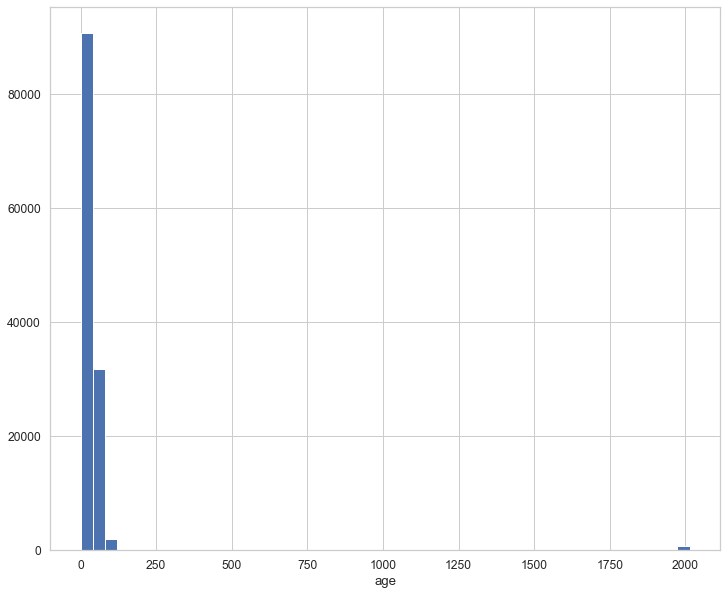

In [24]:
sns.distplot(df.age.dropna(), kde=False, hist_kws={"alpha":1})
plt.show()

##### *We can see that Age feature has outliers, incorrrect values; Hence below processing*

In [25]:
df_withYear = df_2.age>1000
df_3 = df_2.copy()
df_3.loc[df_withYear,'age'] = 2020 - df_3.loc[df_withYear,'age']
df_3.loc[df_3.age > 122,'age'] = np.nan   #Replace all ages above 122 as null as 122 is Age of oldest person ever lived 
df_3.loc[df_3.age < 18, 'age'] = np.nan   #Replace all ages below 18 as null because AIRbnb users cannot have age below 18 (As per AirBnbs rules  )
df_3['age'].describe()

count    124551.000000
mean         37.454328
std          13.947626
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         115.000000
Name: age, dtype: float64

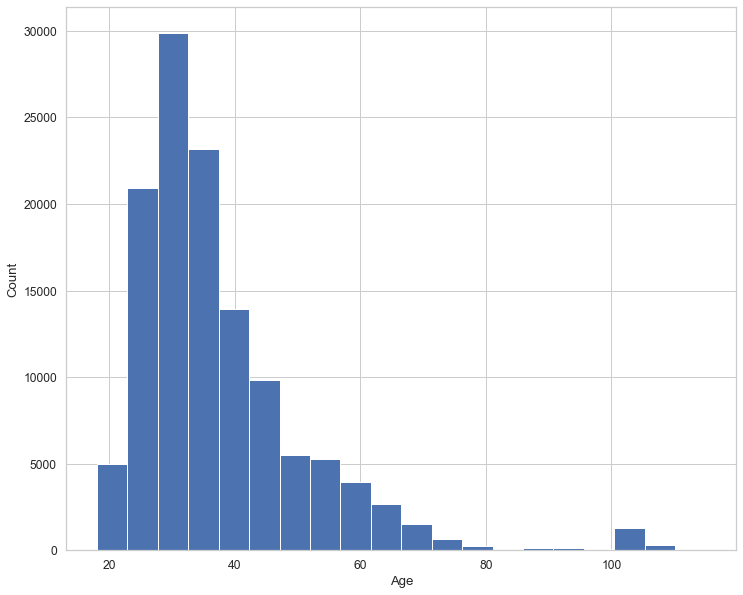

In [26]:
sns.distplot(df_3.age.dropna(), kde=False, bins=20, hist_kws={"alpha":1}).set(xlabel='Age', ylabel='Count')
plt.show()

##### *We can see that maximum travellers using AirBnB are in the age group of 25 to 40; Also there are few travelers in the age of 18-20 and 72 to 88*

In [27]:
#percent of missing data in new datframe
percent_missing_1 = df_3.isnull().sum() * 100 / len(df_3)
missing_value_df_1 = pd.DataFrame({'percent_missing': percent_missing_1})
missing_value_df_1

,percent_missing
id,0.000000
date_account_created,0.000000
timestamp_first_active,0.000000
gender,44.829024
age,41.648903
signup_method,0.000000
signup_flow,0.000000
language,0.000000
affiliate_channel,0.000000
affiliate_provider,0.000000


Converting time columns into month year day columns

In [28]:
df_4=df_3.copy()

In [29]:
df_4['date_account_created'] = pd.to_datetime(df_4.date_account_created)
df_4['timestamp_first_active'] = pd.to_datetime(df_4.timestamp_first_active , format='%Y%m%d%H%M%S')

In [30]:
df_4['account_created_year'] = df_4['date_account_created'].dt.year 
df_4['account_created_month'] = df_4['date_account_created'].dt.month_name()
#data_3['account_created_month_name'] = data_3['date_account_created'].dt.month 
df_4['account_created_day'] = df_4['date_account_created'].dt.day 
df_4['account_created_weekday'] =df_4['date_account_created'].dt.day_name()
df_4['first_active_year'] = df_4['timestamp_first_active'].dt.year 
df_4['first_active_month'] = df_4['timestamp_first_active'].dt.month_name()
df_4['first_active_day'] = df_4['timestamp_first_active'].dt.day 
df_4['first_active_weekday'] = df_4['timestamp_first_active'].dt.day_name()
df_4['first_active_hour'] = df_4['timestamp_first_active'].dt.hour 
df_4['first_active_minute'] = df_4['timestamp_first_active'].dt.minute 

Drop columns date_account_created, timestamp_first_active

In [31]:
df_5=df_4.drop(columns=['date_account_created','timestamp_first_active'])

In [32]:
df_5.head(5)

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_year,account_created_month,account_created_day,account_created_weekday,first_active_year,first_active_month,first_active_day,first_active_weekday,first_active_hour,first_active_minute
0,gxn3p5htnn,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,June,28,Monday,2009,March,19,Thursday,4,32
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,May,25,Wednesday,2009,May,23,Saturday,17,48
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,September,28,Tuesday,2009,June,9,Tuesday,23,12
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,December,5,Monday,2009,October,31,Saturday,6,1
4,87mebub9p4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,September,14,Tuesday,2009,December,8,Tuesday,6,11


In [33]:
df_5.columns

Index(['id', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination', 'account_created_year', 'account_created_month', 'account_created_day', 'account_created_weekday', 'first_active_year', 'first_active_month', 'first_active_day', 'first_active_weekday', 'first_active_hour', 'first_active_minute'], dtype='object')

In [34]:
numerical = ['age','signup_flow',  'account_created_day',  'first_active_day',  'first_active_hour', 'first_active_minute']
categorical = ['gender','signup_method',  'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']
categorical1=['gender','signup_method',  'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination','account_created_weekday','first_active_weekday','account_created_year','first_active_year','first_active_month','account_created_month']

In [35]:
booked = df[df.date_first_booking.notnull()]
notBooked = df[df.date_first_booking.isnull()]

#### *TRAVELLERS WHO BOOKED*

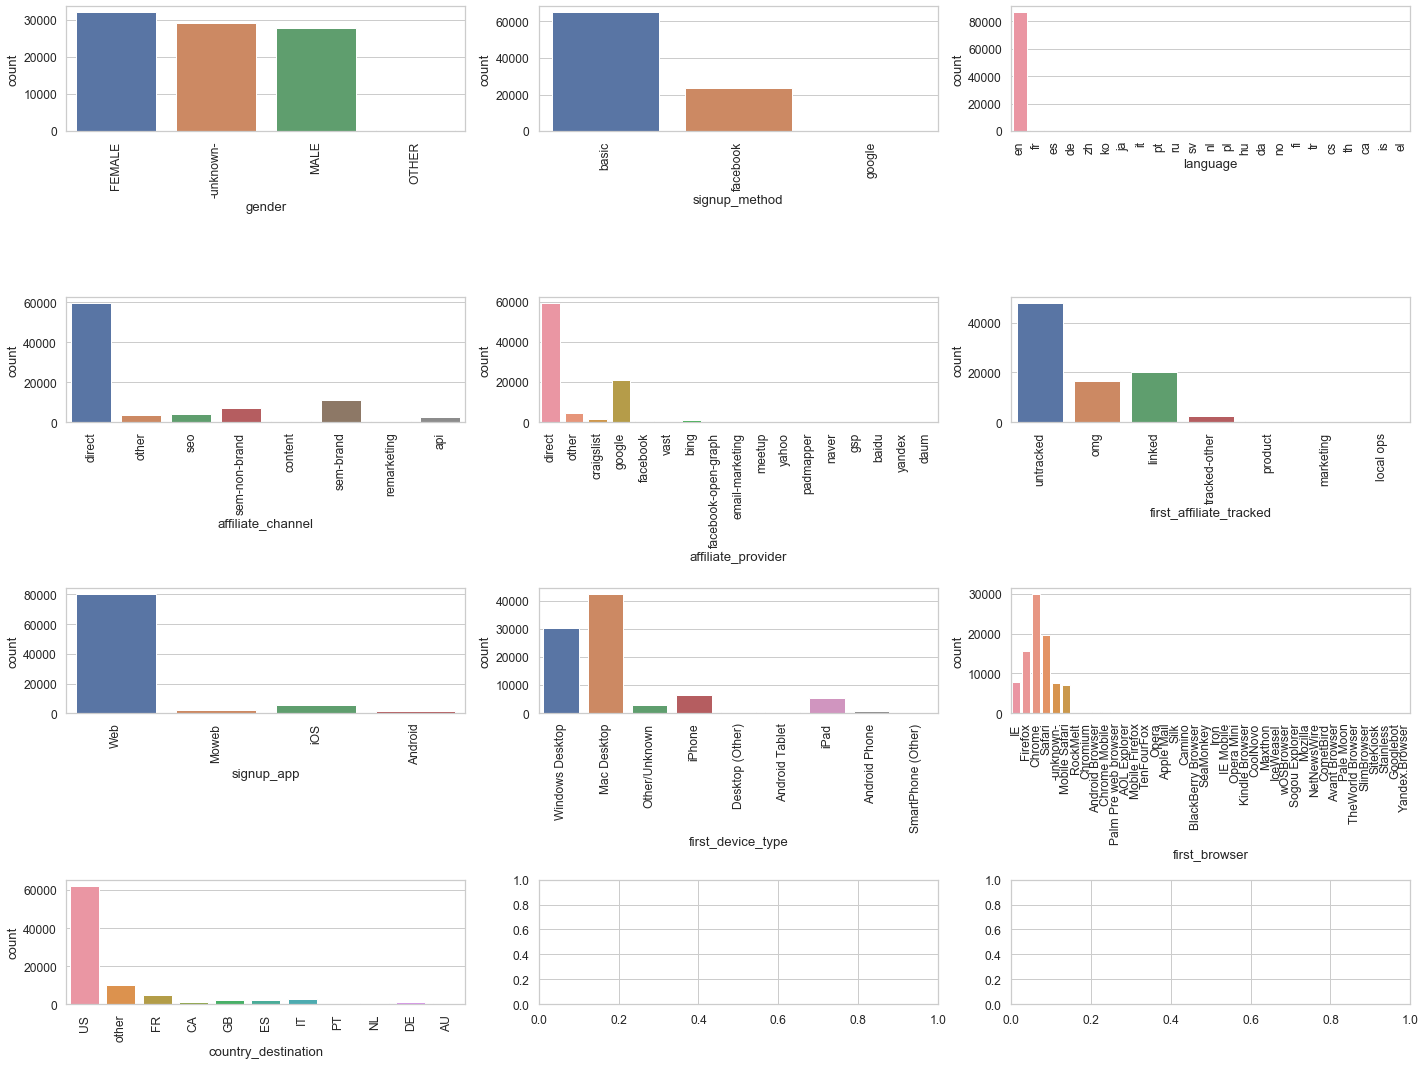

In [36]:
fig, ax = plt.subplots(4,3, figsize=(20,15))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(booked[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout()

#### *TRAVELLERS WHO DIDNOT BOOK*

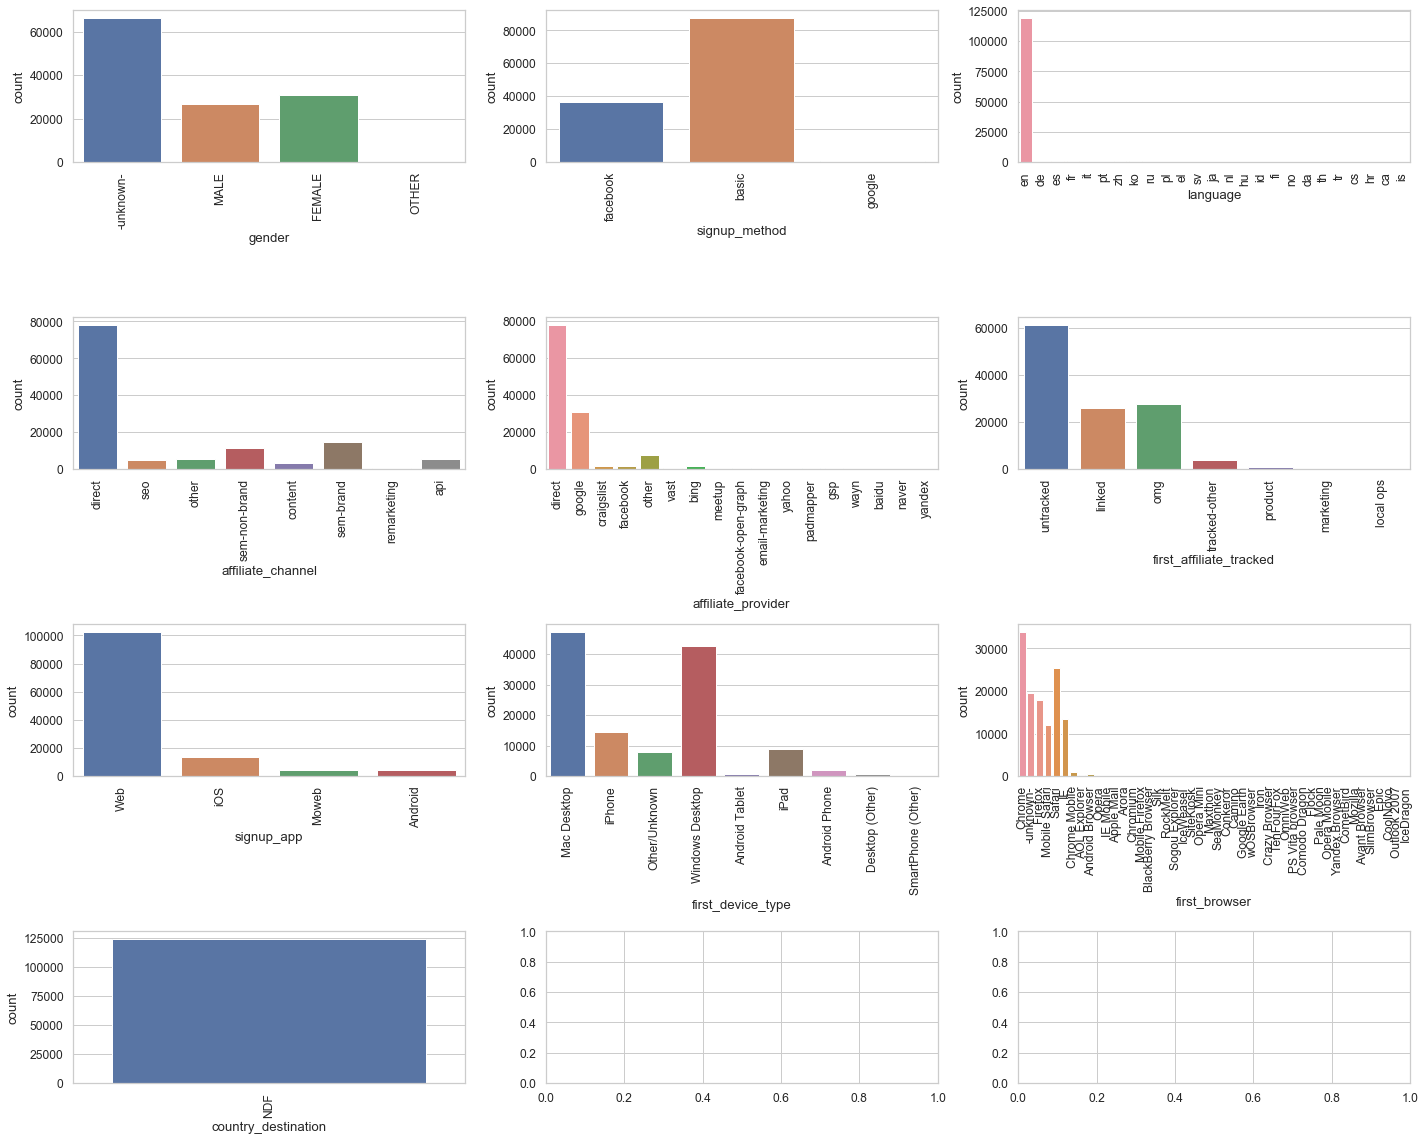

In [37]:
fig, ax = plt.subplots(4,3, figsize=(20,16))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(notBooked[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout()

##### *This applies to both cluster of travellers (Travellers who booked and those who did not book),*
##### *- Gender is unknown for many travellers; hence we cannot say which gender has higher preference towards AirBNB*
##### *- Most travellers login through AirBNB signup and not social media signup (Facebook/Google)*
##### *- Most travellers sign up for airbnb after coming from one particular page, 0; followed by page 25*
##### *- Majority travellers language preference is English*
##### *- Apart from most travellers coming direclty to AirBNB portal, Marketing via google helps AirBNB to get more footfall*
##### *- The usage of AirBNB portal on desktop is more compared to the use on handheld devices (via apps & mobile browsing)*
##### *- Most users of AirBNB use apple products (Mac Desktop, IPhone, Ipad)*

<br>

##### *Also for Travellers who booked,*
##### *- As this data belong to USA users; Most travellers prefer booking thier travel in thier home country USA*

#### *ALL TRAVELLERS*

In [104]:
#Numeric Column Distribution

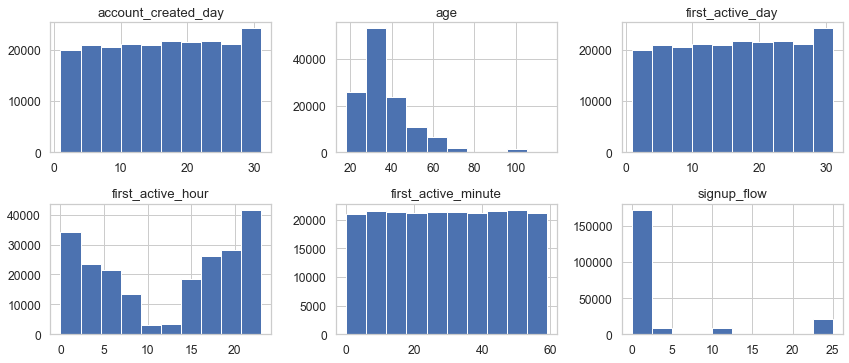

In [38]:
df_5[numerical].hist(bins=10, layout=(4,3))
plt.tight_layout()
plt.show()

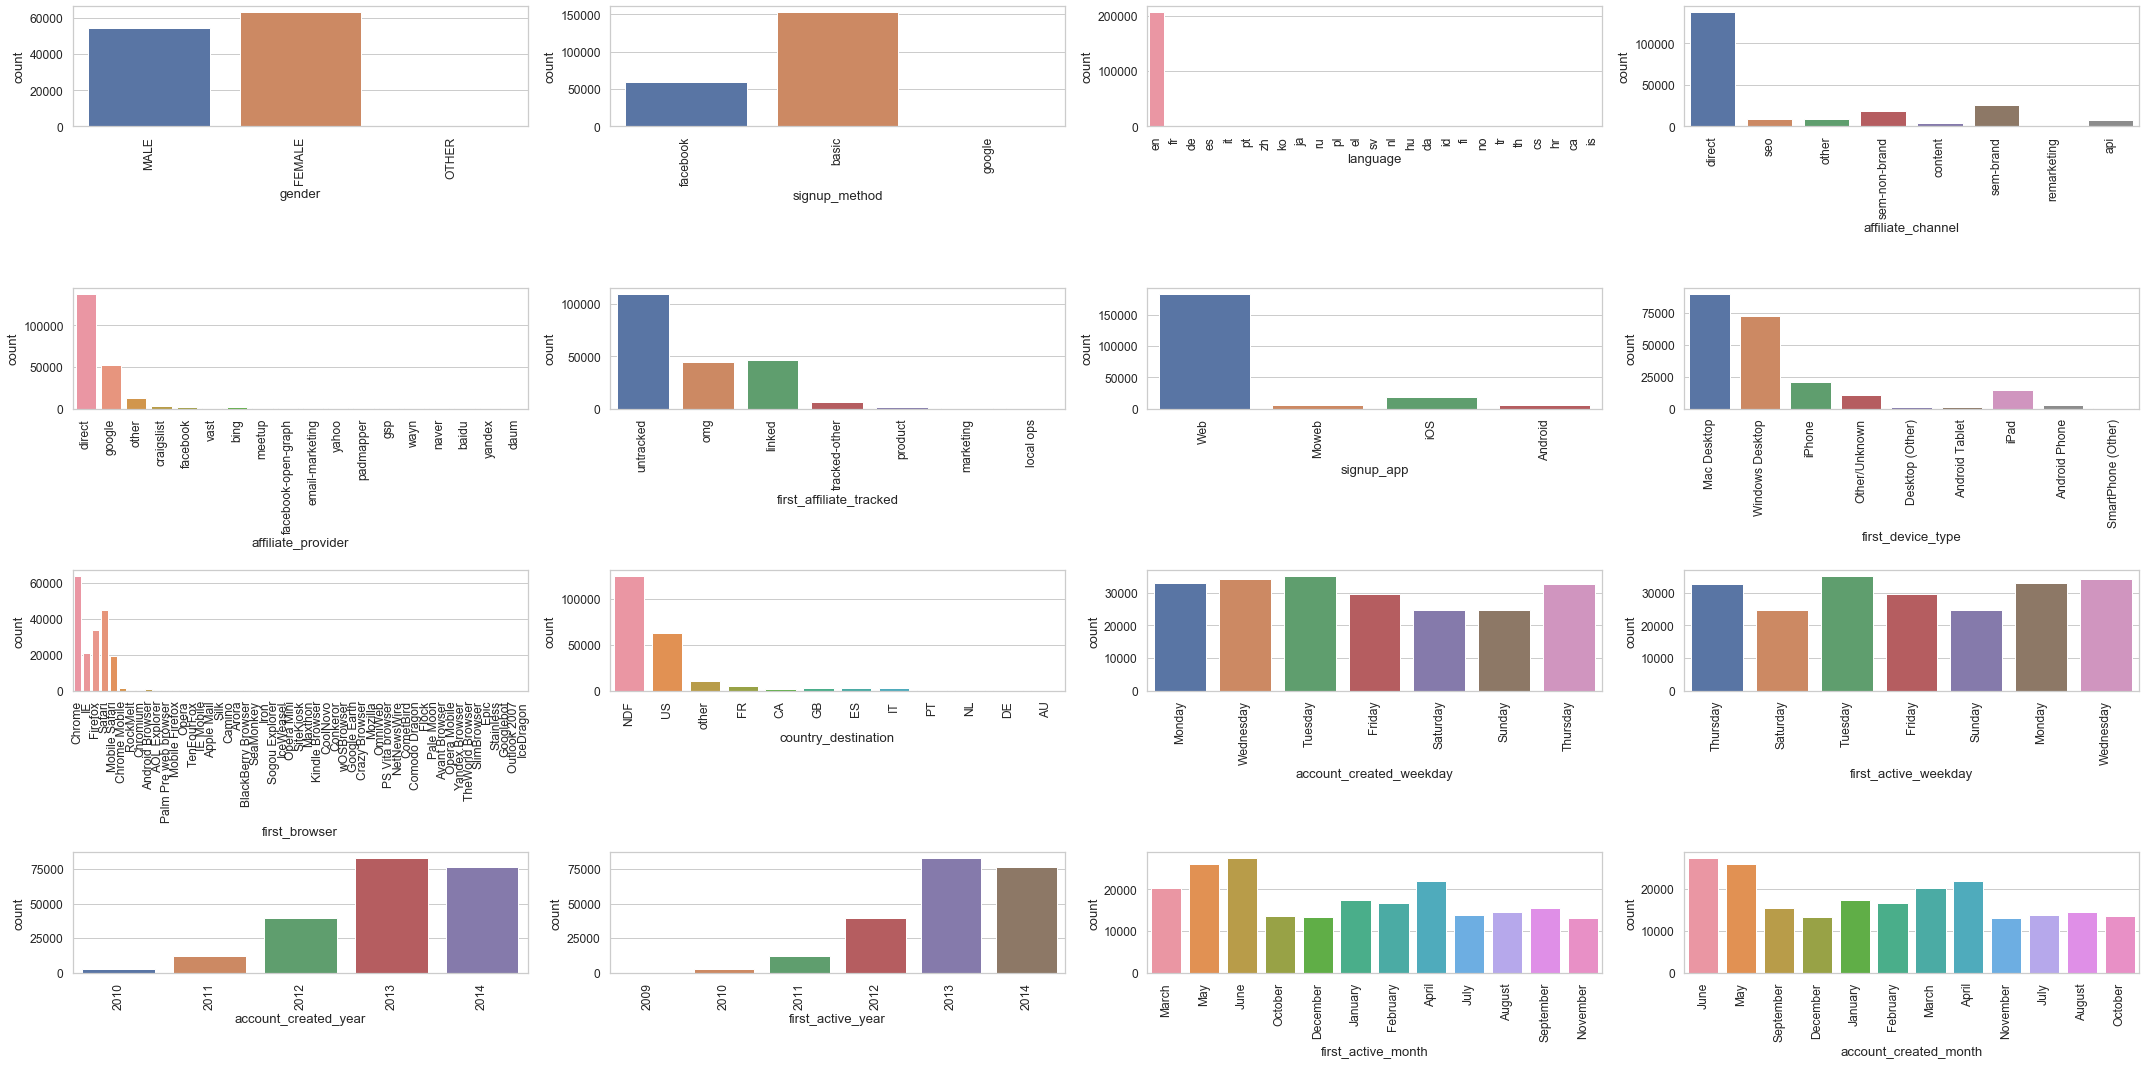

In [40]:
fig, ax = plt.subplots(4,4, figsize=(30,15))
for variable, subplot in zip(categorical1, ax.flatten()):
    sns.countplot(df_5[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.tight_layout()

##### *-People become less active during period of 8 AM and 2 PM. But after 2 PM and before 8 AM the distrbution of people being active on AirBNB is very high. The time period of 8AM to 2PM is generally office hours so that could be reason that there is such a low count in this period.*
##### *- As this data belong to USA users; Most travellers prefer booking thier travel in thier home country USA*


<br>



##### *- Account Created year and first active year columns have similar pattern. Also it looks like Airbnb user can be active on AirBNb without having account with it. As stated by Airbnb ' timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up'*
##### *- User tend to be more active during weekdays in Airbnb compared to Weekennds*
##### *- Maximum activity in AirBnb seems to be around month May and June followed by March and April*
##### *- Account created year  and First active year have 2013 as the highest count category. But there is now one more year 2009 in First active year. *
#### *-The year 2013 had maximum users accounts folllowed by 2014. But the data for 2014 is uptil 7/1/2014 which is 5 months less than other years.*


# Bivariate Analysis

Age and Gender relation

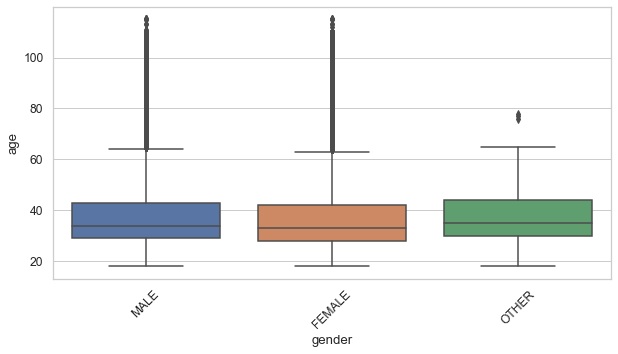

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x="gender", y="age", data=df_5)
plt.xticks(rotation=45)
plt.show()

<Figure size 720x360 with 0 Axes>

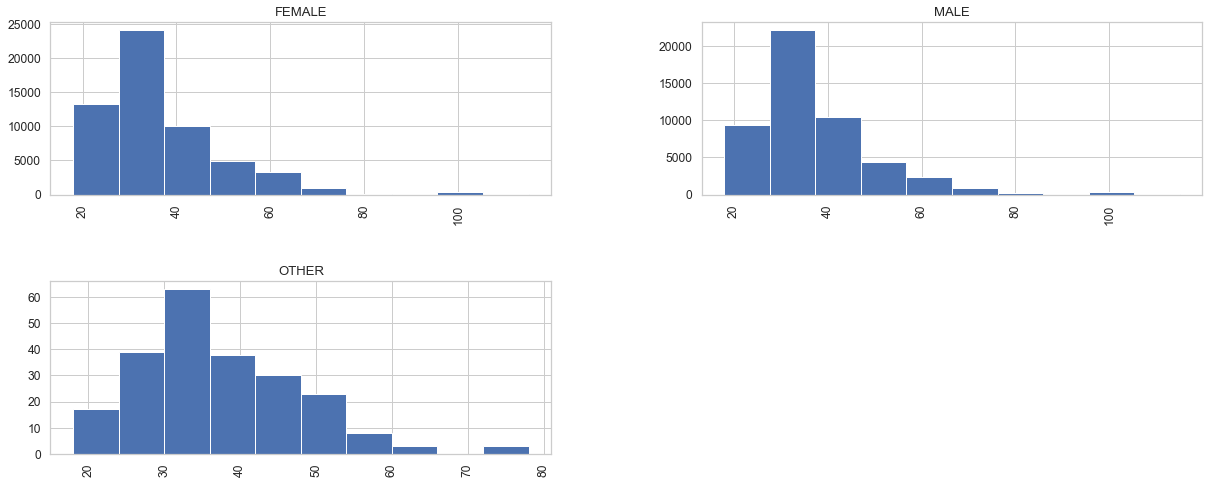

In [42]:
plt.figure(figsize=(10,5))
df_5['age'].hist(by=df_5['gender'],figsize=(20,8))
plt.show()

Maximum female users are young between age 18 and 45 compared to male and other category where the age of users is approximatley normally distributed. In male and female categpries we can see a small bar between age group 95 and 120.

Age and Language

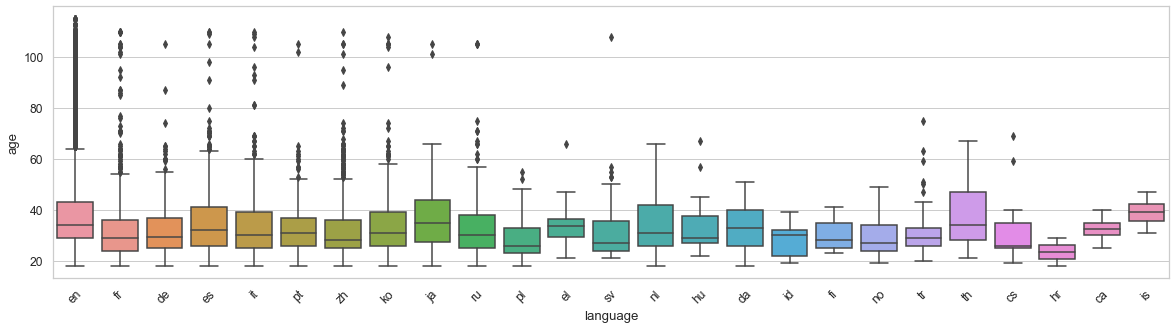

In [43]:
plt.figure(figsize=(20,5))
sns.boxplot(x="language", y="age", data=df_5)
plt.xticks(rotation=45)
plt.show()

<Figure size 720x576 with 0 Axes>

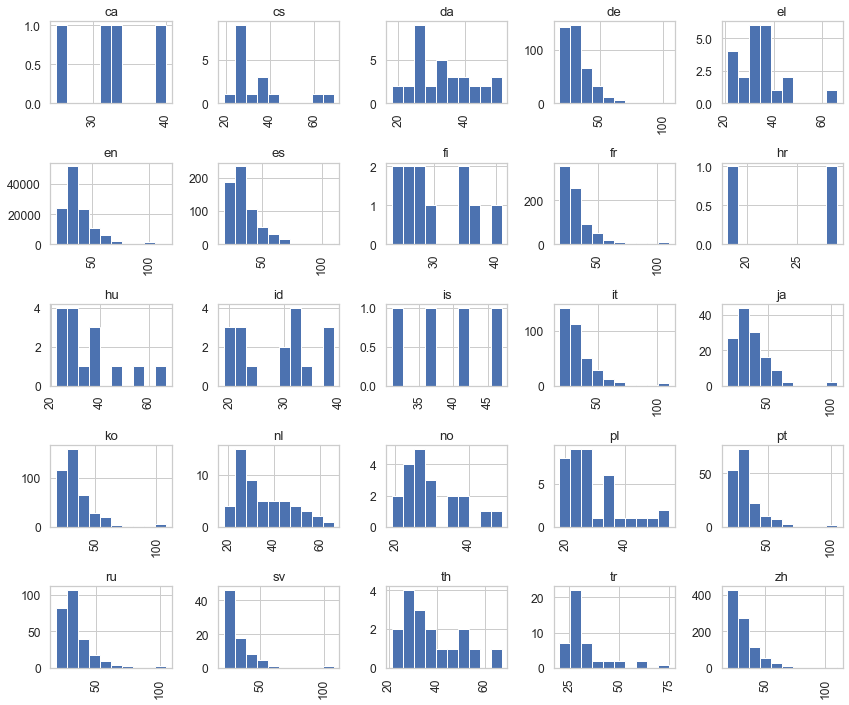

In [44]:
plt.figure(figsize=(10,8))
df_5['age'].hist(by=df_5['language'])
plt.tight_layout()
plt.show()

Distribution of age 

Age and First_Active_year

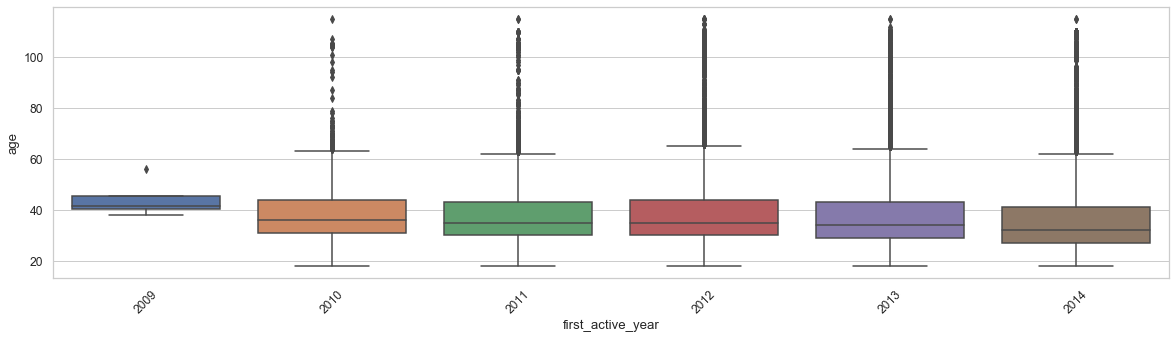

In [45]:
plt.figure(figsize=(20,5))
sns.boxplot(x="first_active_year", y="age", data=df_5)
plt.xticks(rotation=45)
plt.show()

<Figure size 1440x360 with 0 Axes>

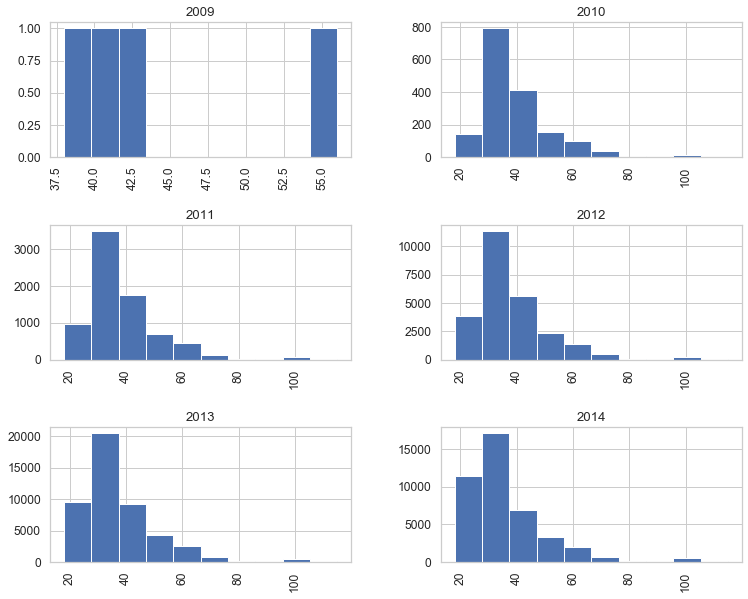

In [46]:
plt.figure(figsize=(20,5))
df_5['age'].hist(by=df_5['first_active_year'])
plt.show()

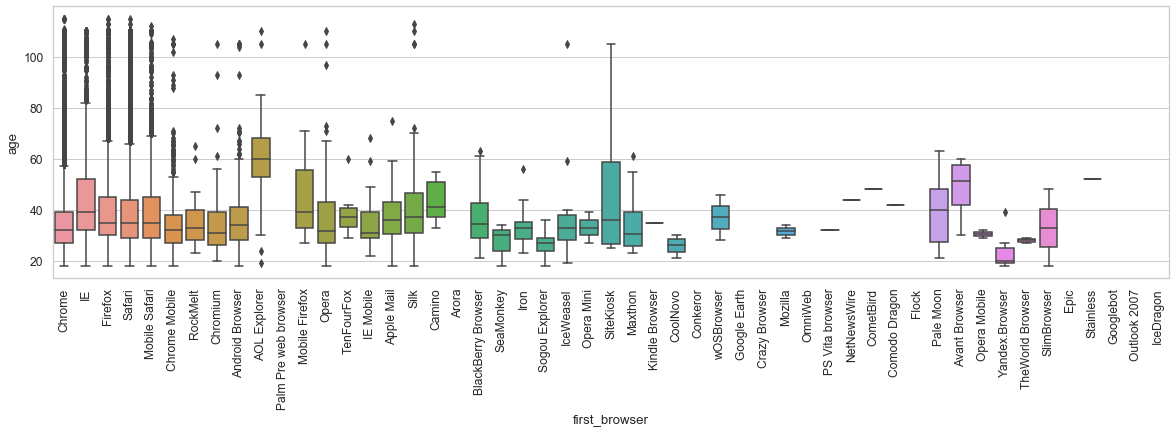

In [47]:
plt.figure(figsize=(20,5))
sns.boxplot(x="first_browser", y="age", data=df_5)
plt.xticks(rotation=90)
plt.show()

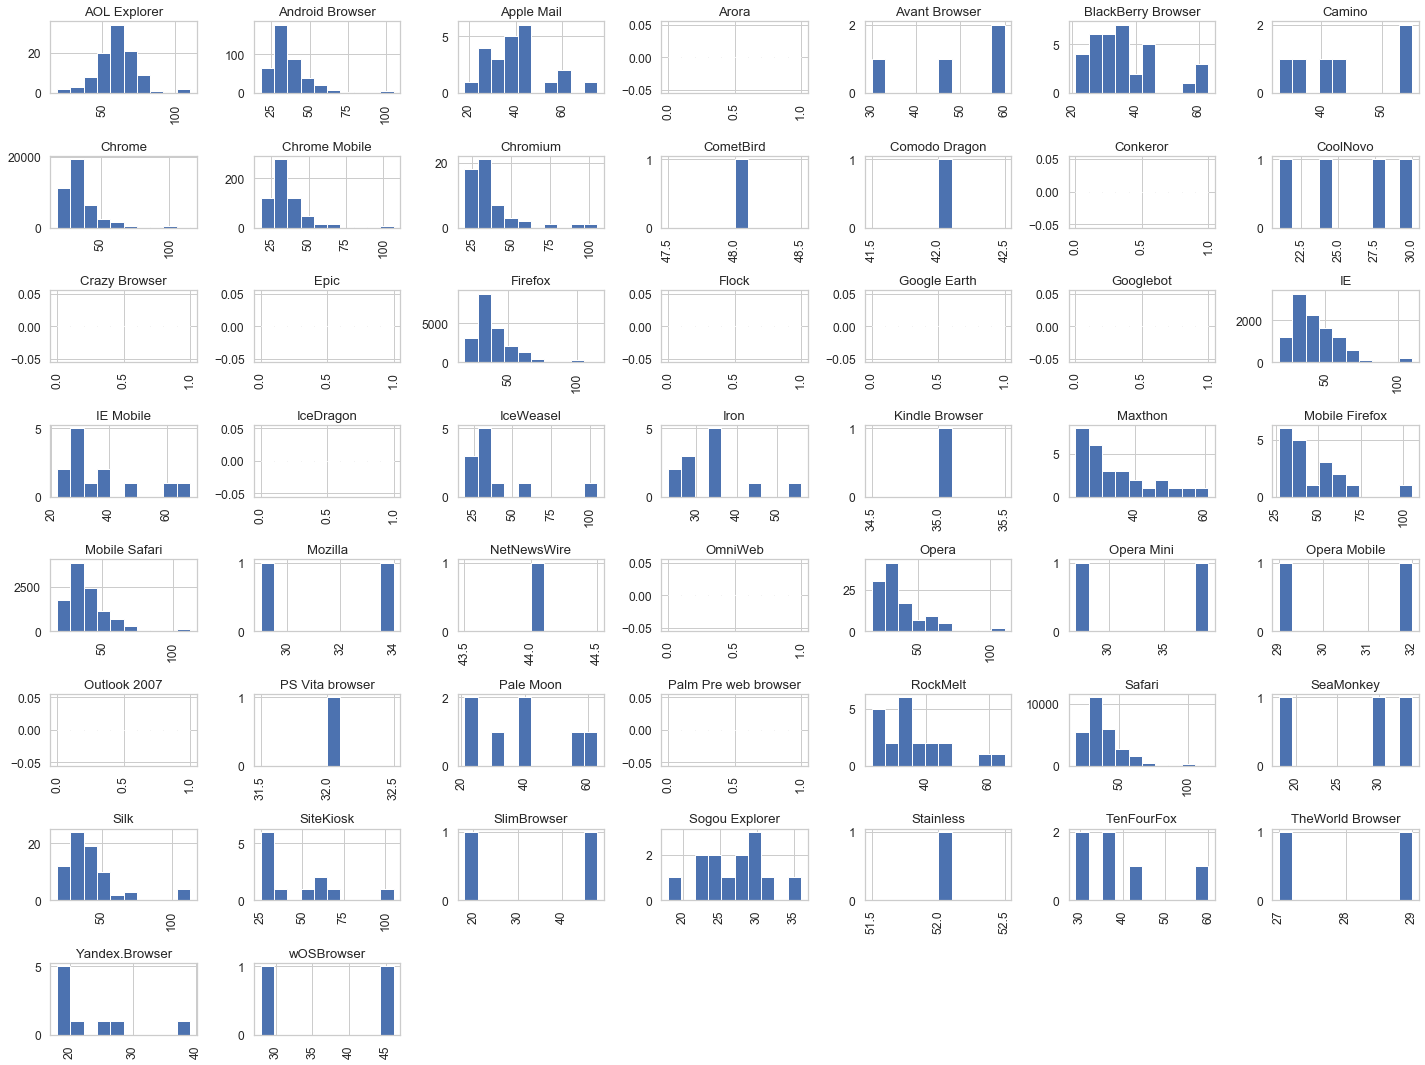

In [181]:
df_5['age'].hist(by=df_5['first_browser'],figsize=(20,15))
plt.tight_layout()
plt.show()

First Affiliate Tracked and affiliate channel

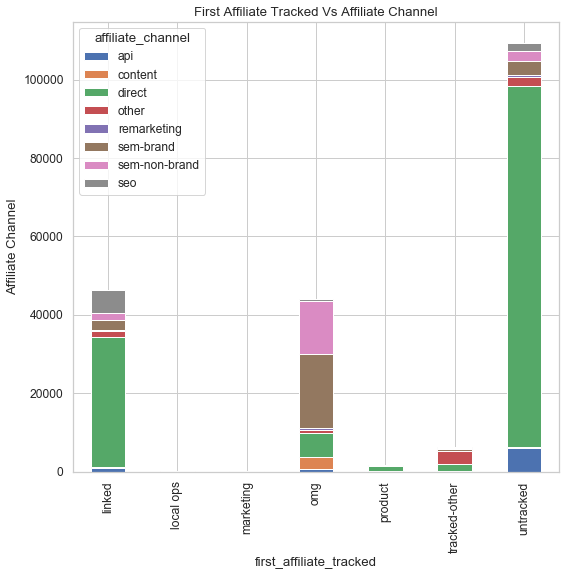

In [52]:
stack_bar = pd.crosstab(index=df_5['first_affiliate_tracked'], columns=df_5['affiliate_channel'])
stack_bar.plot(kind='bar', stacked=True)
plt.ylabel('Affiliate Channel')
plt.title('First Affiliate Tracked Vs Affiliate Channel')
plt.gcf().set_size_inches(8.7, 8.27)
plt.show()

First affiliate tracked and Affiliate provider

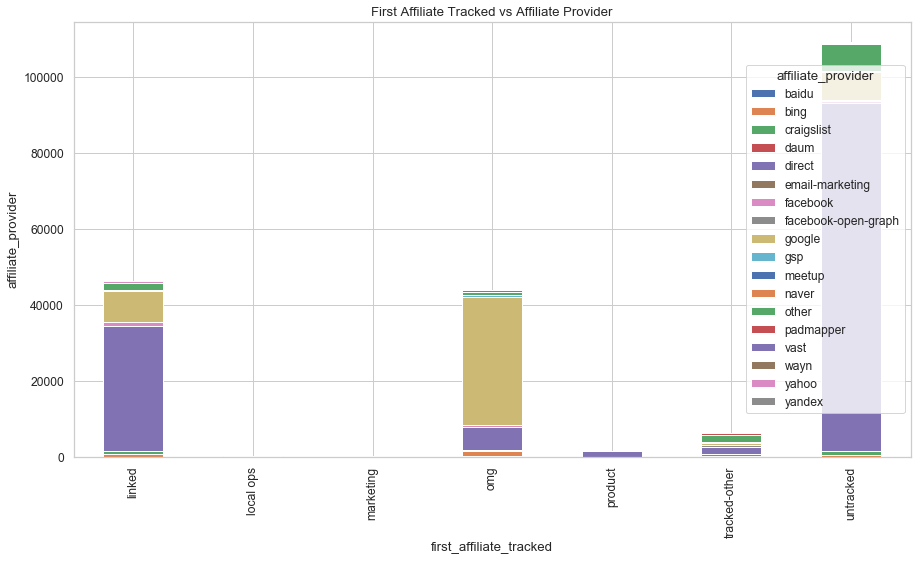

In [53]:
stack_bar = pd.crosstab(index=df_5['first_affiliate_tracked'], columns=df_5['affiliate_provider'])

stack_bar.plot(kind='bar', stacked=True)
plt.ylabel('affiliate_provider')
plt.title('First Affiliate Tracked vs Affiliate Provider')
plt.gcf().set_size_inches(15, 8)
plt.show()

First affiliate tracked and signup app

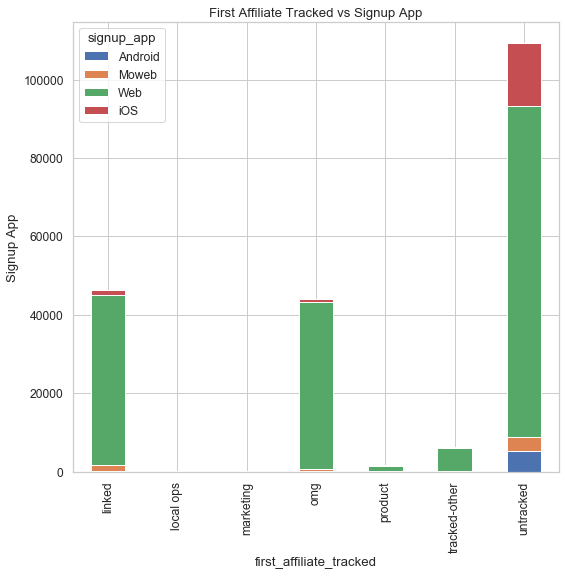

In [54]:
stack_bar = pd.crosstab(index=df_5['first_affiliate_tracked'], columns=df_5['signup_app'])
stack_bar.plot(kind='bar', stacked=True)
plt.ylabel('Signup App')
plt.title('First Affiliate Tracked vs Signup App')
plt.gcf().set_size_inches(8.7, 8.27)
plt.show()

First browser and first device type 

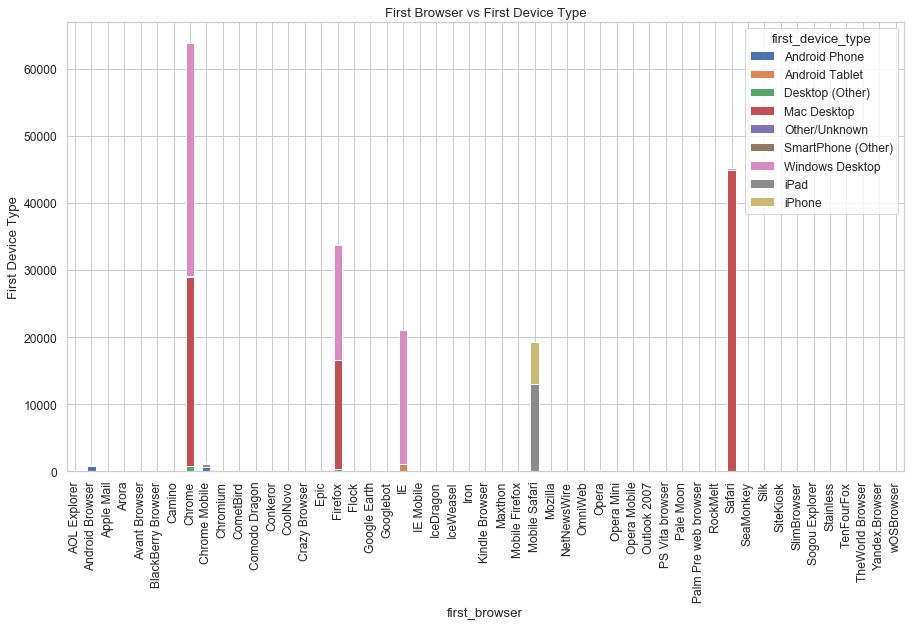

In [55]:
stack_bar = pd.crosstab(index=df_5['first_browser'], columns=df_5['first_device_type'])
stack_bar.plot(kind='bar', stacked=True)
plt.ylabel('First Device Type')
plt.title('First Browser vs First Device Type')
plt.gcf().set_size_inches(15, 8.27)
plt.show()

# Missing Value Imputation

In [56]:
df_6=df_5.copy()

In [57]:
#here we have replaced the null values with a new category rather then imputing a new value in it. 
df_6.gender.replace(np.NaN, 'No_Gender', inplace=True)

here we are replacing age with median by creating groups based on gender,first active year and language column as we found relationship of age with these columns. Age had relationship with first_browser column also but it has missing values in it so we are not considering it for missing value imuptation.

In [58]:
#data_columns = data_5.columns.difference(['signup_method'])
grouped_age = df_6.groupby(['gender', 'first_active_year',  'language'])['age'].transform('median').fillna(0)
df_6['age'] = df_6['age'].fillna(grouped_age)

In [59]:
# first_affiliate_tracked has relationship with signup app, affiliate provider, affilliate channel. hence we used these columns to impute missig values
grouped_fat = df_6.groupby(['signup_app','affiliate_provider','affiliate_channel'])['first_affiliate_tracked'].apply(lambda x: x.fillna(x.mode()[0]))
df_6['first_affiliate_tracked'] = df_6['first_affiliate_tracked'].fillna(grouped_fat)

1. since the first browser seems to have relation with only first device type, we will replace values as in first browser with mode of it
2. first_affiliate_tracked has relationship with signup app, affiliate provider, affilliate channel. hence we used these columns to impute missig values

In [60]:
grouped_first_brow = df_6.groupby('first_device_type')['first_browser'].apply(lambda x: x.fillna(x.mode()[0]))
df_6['first_browser'] = df_6['first_browser'].fillna(grouped_first_brow)

In [61]:
df_6.isnull().sum()

id                         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
account_created_year       0
account_created_month      0
account_created_day        0
account_created_weekday    0
first_active_year          0
first_active_month         0
first_active_day           0
first_active_weekday       0
first_active_hour          0
first_active_minute        0
dtype: int64

In [62]:
df_6.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_created_year,account_created_month,account_created_day,account_created_weekday,first_active_year,first_active_month,first_active_day,first_active_weekday,first_active_hour,first_active_minute
0,gxn3p5htnn,No_Gender,41.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,June,28,Monday,2009,March,19,Thursday,4,32
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,May,25,Wednesday,2009,May,23,Saturday,17,48
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,September,28,Tuesday,2009,June,9,Tuesday,23,12
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,December,5,Monday,2009,October,31,Saturday,6,1
4,87mebub9p4,No_Gender,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,September,14,Tuesday,2009,December,8,Tuesday,6,11


In [63]:
df_6.shape

(213451, 23)

In [64]:
#Dropping id column as it is a unique number and will be different for every user. It will not any value to our analysis and model building
df_7=df_6.drop('id', axis=1)

# Data Preprocessing

In [65]:
#Dividing object and numeric datatypes 
num_data=df_7.select_dtypes(exclude='object')
obj_data=df_7.select_dtypes(include='object')

In [66]:
num_data.head()

,age,signup_flow,account_created_year,account_created_day,first_active_year,first_active_day,first_active_hour,first_active_minute
0,41.0,0,2010,28,2009,19,4,32
1,38.0,0,2011,25,2009,23,17,48
2,56.0,3,2010,28,2009,9,23,12
3,42.0,0,2011,5,2009,31,6,1
4,41.0,0,2010,14,2009,8,6,11


In [67]:
print('# of account_created_year: ',num_data['account_created_year'].nunique())
print('# of first_active_year: ',num_data['first_active_year'].nunique())

# of account_created_year:  5
# of first_active_year:  6


Since years are discrete, we will treat them as categorical variable and will change their datatype to object

In [68]:
df_8=df_7.copy()
df_8['account_created_year']=df_8['account_created_year'].astype('object')
df_8['first_active_year']=df_8['first_active_year'].astype('object')

In [69]:
df_8.dtypes

gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
account_created_year        object
account_created_month       object
account_created_day          int64
account_created_weekday     object
first_active_year           object
first_active_month          object
first_active_day             int64
first_active_weekday        object
first_active_hour            int64
first_active_minute          int64
dtype: object

In [70]:
df_8.select_dtypes(include='object').columns

Index(['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination', 'account_created_year', 'account_created_month', 'account_created_weekday', 'first_active_year', 'first_active_month', 'first_active_weekday'], dtype='object')

### Encoding

In [72]:
#We have used one hot encoding as all categorical have discrete groups that were of nominal type
OHE = OneHotEncoder(categories='auto')

In [73]:
feature_arr = OHE.fit_transform(df_8.select_dtypes(include='object')).toarray()

In [74]:
features_name=OHE.get_feature_names()

In [75]:
features = pd.DataFrame(feature_arr, columns=features_name)

In [76]:
features.head()

,x0_FEMALE,x0_MALE,x0_No_Gender,x0_OTHER,x1_basic,x1_facebook,x1_google,x2_ca,x2_cs,x2_da,x2_de,x2_el,x2_en,x2_es,x2_fi,x2_fr,x2_hr,x2_hu,x2_id,x2_is,x2_it,x2_ja,x2_ko,x2_nl,x2_no,x2_pl,x2_pt,x2_ru,x2_sv,x2_th,x2_tr,x2_zh,x3_api,x3_content,x3_direct,x3_other,x3_remarketing,x3_sem-brand,x3_sem-non-brand,x3_seo,x4_baidu,x4_bing,x4_craigslist,x4_daum,x4_direct,x4_email-marketing,x4_facebook,x4_facebook-open-graph,x4_google,x4_gsp,x4_meetup,x4_naver,x4_other,x4_padmapper,x4_vast,x4_wayn,x4_yahoo,x4_yandex,x5_linked,x5_local ops,x5_marketing,x5_omg,x5_product,x5_tracked-other,x5_untracked,x6_Android,x6_Moweb,x6_Web,x6_iOS,x7_Android Phone,x7_Android Tablet,x7_Desktop (Other),x7_Mac Desktop,x7_Other/Unknown,x7_SmartPhone (Other),x7_Windows Desktop,x7_iPad,x7_iPhone,x8_AOL Explorer,x8_Android Browser,x8_Apple Mail,x8_Arora,x8_Avant Browser,x8_BlackBerry Browser,x8_Camino,x8_Chrome,x8_Chrome Mobile,x8_Chromium,x8_CometBird,x8_Comodo Dragon,x8_Conkeror,x8_CoolNovo,x8_Crazy Browser,x8_Epic,x8_Firefox,x8_Flock,x8_Google Earth,x8_Googlebot,x8_IE,x8_IE Mobile,x8_IceDragon,x8_IceWeasel,x8_Iron,x8_Kindle Browser,x8_Maxthon,x8_Mobile Firefox,x8_Mobile Safari,x8_Mozilla,x8_NetNewsWire,x8_OmniWeb,x8_Opera,x8_Opera Mini,x8_Opera Mobile,x8_Outlook 2007,x8_PS Vita browser,x8_Pale Moon,x8_Palm Pre web browser,x8_RockMelt,x8_Safari,x8_SeaMonkey,x8_Silk,x8_SiteKiosk,x8_SlimBrowser,x8_Sogou Explorer,x8_Stainless,x8_TenFourFox,x8_TheWorld Browser,x8_Yandex.Browser,x8_wOSBrowser,x9_AU,x9_CA,x9_DE,x9_ES,x9_FR,x9_GB,x9_IT,x9_NDF,x9_NL,x9_PT,x9_US,x9_other,x10_2010,x10_2011,x10_2012,x10_2013,x10_2014,x11_April,x11_August,x11_December,x11_February,x11_January,x11_July,x11_June,x11_March,x11_May,x11_November,x11_October,x11_September,x12_Friday,x12_Monday,x12_Saturday,x12_Sunday,x12_Thursday,x12_Tuesday,x12_Wednesday,x13_2009,x13_2010,x13_2011,x13_2012,x13_2013,x13_2014,x14_April,x14_August,x14_December,x14_February,x14_January,x14_July,x14_June,x14_March,x14_May,x14_November,x14_October,x14_September,x15_Friday,x15_Monday,x15_Saturday,x15_Sunday,x15_Thursday,x15_Tuesday,x15_Wednesday
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [77]:
features.shape

(213451, 190)

In [78]:
df_8.select_dtypes(exclude='object').head()

,age,signup_flow,account_created_day,first_active_day,first_active_hour,first_active_minute
0,41.0,0,28,19,4,32
1,38.0,0,25,23,17,48
2,56.0,3,28,9,23,12
3,42.0,0,5,31,6,1
4,41.0,0,14,8,6,11


### Feature Scaling

In [79]:
#Min-Max Scaler as we want values to range between 0 and 1
scaler = MinMaxScaler()

In [80]:
num_data_scaled=scaler.fit_transform(df_8.select_dtypes(exclude='object'))

In [81]:
num_data_scaled_1=pd.DataFrame(num_data_scaled)

In [82]:
num_data_rename=num_data_scaled_1.rename({'0':'age', '1':'signup_flow','2':'account_created_day',"3":"first_active_day","4":"first_active_hour", "5":"first_active_minute"}, axis =1)

In [83]:
num_data_rename.columns = ['age', 'signup_flow', 'account_created_day', 'first_active_day', 'first_active_hour', 'first_active_minute']

In [84]:
num_data_rename.head()

,age,signup_flow,account_created_day,first_active_day,first_active_hour,first_active_minute
0,0.356522,0.00,0.900000,0.600000,0.173913,0.542373
1,0.330435,0.00,0.800000,0.733333,0.739130,0.813559
2,0.486957,0.12,0.900000,0.266667,1.000000,0.203390
3,0.365217,0.00,0.133333,1.000000,0.260870,0.016949
4,0.356522,0.00,0.433333,0.233333,0.260870,0.186441


In [85]:
new_data= pd.concat([num_data_rename,features, df_8['country_destination']], axis=1)

In [86]:
new_data.shape

(213451, 197)

In [87]:
new_data.head()

,age,signup_flow,account_created_day,first_active_day,first_active_hour,first_active_minute,x0_FEMALE,x0_MALE,x0_No_Gender,x0_OTHER,x1_basic,x1_facebook,x1_google,x2_ca,x2_cs,x2_da,x2_de,x2_el,x2_en,x2_es,x2_fi,x2_fr,x2_hr,x2_hu,x2_id,x2_is,x2_it,x2_ja,x2_ko,x2_nl,x2_no,x2_pl,x2_pt,x2_ru,x2_sv,x2_th,x2_tr,x2_zh,x3_api,x3_content,x3_direct,x3_other,x3_remarketing,x3_sem-brand,x3_sem-non-brand,x3_seo,x4_baidu,x4_bing,x4_craigslist,x4_daum,x4_direct,x4_email-marketing,x4_facebook,x4_facebook-open-graph,x4_google,x4_gsp,x4_meetup,x4_naver,x4_other,x4_padmapper,x4_vast,x4_wayn,x4_yahoo,x4_yandex,x5_linked,x5_local ops,x5_marketing,x5_omg,x5_product,x5_tracked-other,x5_untracked,x6_Android,x6_Moweb,x6_Web,x6_iOS,x7_Android Phone,x7_Android Tablet,x7_Desktop (Other),x7_Mac Desktop,x7_Other/Unknown,x7_SmartPhone (Other),x7_Windows Desktop,x7_iPad,x7_iPhone,x8_AOL Explorer,x8_Android Browser,x8_Apple Mail,x8_Arora,x8_Avant Browser,x8_BlackBerry Browser,x8_Camino,x8_Chrome,x8_Chrome Mobile,x8_Chromium,x8_CometBird,x8_Comodo Dragon,x8_Conkeror,x8_CoolNovo,x8_Crazy Browser,x8_Epic,x8_Firefox,x8_Flock,x8_Google Earth,x8_Googlebot,x8_IE,x8_IE Mobile,x8_IceDragon,x8_IceWeasel,x8_Iron,x8_Kindle Browser,x8_Maxthon,x8_Mobile Firefox,x8_Mobile Safari,x8_Mozilla,x8_NetNewsWire,x8_OmniWeb,x8_Opera,x8_Opera Mini,x8_Opera Mobile,x8_Outlook 2007,x8_PS Vita browser,x8_Pale Moon,x8_Palm Pre web browser,x8_RockMelt,x8_Safari,x8_SeaMonkey,x8_Silk,x8_SiteKiosk,x8_SlimBrowser,x8_Sogou Explorer,x8_Stainless,x8_TenFourFox,x8_TheWorld Browser,x8_Yandex.Browser,x8_wOSBrowser,x9_AU,x9_CA,x9_DE,x9_ES,x9_FR,x9_GB,x9_IT,x9_NDF,x9_NL,x9_PT,x9_US,x9_other,x10_2010,x10_2011,x10_2012,x10_2013,x10_2014,x11_April,x11_August,x11_December,x11_February,x11_January,x11_July,x11_June,x11_March,x11_May,x11_November,x11_October,x11_September,x12_Friday,x12_Monday,x12_Saturday,x12_Sunday,x12_Thursday,x12_Tuesday,x12_Wednesday,x13_2009,x13_2010,x13_2011,x13_2012,x13_2013,x13_2014,x14_April,x14_August,x14_December,x14_February,x14_January,x14_July,x14_June,x14_March,x14_May,x14_November,x14_October,x14_September,x15_Friday,x15_Monday,x15_Saturday,x15_Sunday,x15_Thursday,x15_Tuesday,x15_Wednesday,country_destination
0,0.356522,0.00,0.900000,0.600000,0.173913,0.542373,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NDF
1,0.330435,0.00,0.800000,0.733333,0.739130,0.813559,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NDF
2,0.486957,0.12,0.900000,0.266667,1.000000,0.203390,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## **3. Building Machine Learning Models**

#### Train-test Split 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(['country_destination'], axis=1), new_data['country_destination'], test_size=0.33, random_state=42)

### 3.1 KNeighborsClassifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

print("Accuracy of KNC:",metrics.accuracy_score(y_test, knn_predictions))

print("F1-Score of KNC:",metrics.f1_score(y_test, knn_predictions, average = 'macro'))



Accuracy of KNC: 0.8709663680631469
F1-Score of KNC: 0.25588429607391544


In [92]:
y_prob = knn_classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")

print("One-vs-One ROC AUC scores of KNC:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores of KNC:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores of KNC:
0.694374 (macro),
0.805360 (weighted by prevalence)
One-vs-Rest ROC AUC scores of KNC:
0.713389 (macro),
0.957677 (weighted by prevalence)


### 3.1 Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [94]:
clf = MultinomialNB()

In [95]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [108]:
y_pred_mnb = clf.predict(X_test)

In [97]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mnb ))

Accuracy: 0.9999574099575519


In [98]:
print("F1-Score:",metrics.f1_score(y_test, y_pred_mnb , average = 'macro'))

F1-Score: 0.998402447856591


In [99]:
metrics.multilabel_confusion_matrix(y_test, y_pred_mnb )

array([[[70257,     0],
        [    0,   182]],

       [[69983,     0],
        [    0,   456]],

       [[70080,     1],
        [    0,   358]],

       [[69696,     0],
        [    0,   743]],

       [[68794,     0],
        [    0,  1645]],

       [[69602,     0],
        [    0,   837]],

       [[69487,     0],
        [    0,   952]],

       [[29532,     2],
        [    0, 40905]],

       [[70198,     0],
        [    0,   241]],

       [[70353,     0],
        [    3,    83]],

       [[49725,     0],
        [    0, 20714]],

       [[67119,     0],
        [    0,  3320]]], dtype=int64)

#### *AUC Score*

In [100]:
from sklearn.metrics import roc_curve, auc,roc_auc_score

y_prob = clf.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)


### 3.2 Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, oob_score=True)

In [102]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

Get the output in terms of accuracy and other measures like F1 socre

In [104]:
y_pred_RFC = rfc.predict(X_test)

print("Accuracy of RFC:",metrics.accuracy_score(y_test, y_pred_RFC))
print("F1-Score of RFC:",metrics.f1_score(y_test, y_pred_RFC, average = 'macro'))

Accuracy of RFC: 0.9999716066383679
F1-Score of RFC: 0.9993373832010938


In [106]:
y_prob_rfc = rfc.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob_rfc, multi_class="ovo", average="macro") 
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob_rfc, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob_rfc, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob_rfc, multi_class="ovr", average="weighted")

print("One-vs-One ROC AUC scores of MNB:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores of MNB:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores of MNB:
0.999999 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores of MNB:
1.000000 (macro),
1.000000 (weighted by prevalence)


## Model Selection - The Best Performer

In [109]:
print("Accuracy of KNC:",metrics.accuracy_score(y_test, knn_predictions))
print("Accuracy of MNB:",metrics.accuracy_score(y_test, y_pred_mnb ))
print("Accuracy of RFC:",metrics.accuracy_score(y_test, y_pred_RFC))


print("F1-Score of KNC:",metrics.f1_score(y_test, knn_predictions, average = 'macro'))
print("F1-Score of MNB:",metrics.f1_score(y_test, y_pred_mnb , average = 'macro'))
print("F1-Score of RFC:",metrics.f1_score(y_test, y_pred_RFC, average = 'macro'))



print("One-vs-One ROC AUC scores of KNC:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores of KNC:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

print("One-vs-One ROC AUC scores of KNC:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores of KNC:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

print("One-vs-One ROC AUC scores of MNB:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores of MNB:\n{:.6f} (macro),\n{:.6f} " "(weighted by prevalence)" .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Accuracy of KNC: 0.8709663680631469
Accuracy of MNB: 0.9999574099575519
Accuracy of RFC: 0.9999716066383679
F1-Score of KNC: 0.25588429607391544
F1-Score of MNB: 0.998402447856591
F1-Score of RFC: 0.9993373832010938
One-vs-One ROC AUC scores of KNC:
0.999999 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores of KNC:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-One ROC AUC scores of KNC:
0.999999 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores of KNC:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-One ROC AUC scores of MNB:
0.999999 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores of MNB:
1.000000 (macro),
1.000000 (weighted by prevalence)
